<a href="https://colab.research.google.com/github/LongLongoooo/AIO_233/blob/AIO_Module_2/AIO_Module_2/Exercise_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

COMPUTE LENGTH OF A VECTOR


In [ ]:
def compute_vector_length(vector: np.array):
  len_of_vector = np.sqrt(np.sum(vector**2))
  return len_of_vector

vector = np.array([-2, 4, 9, 21])
print(round(compute_vector_length(vector), 2))

23.28


DOT PRODUCT

In [ ]:
def compute_dot_product(vector1: np.array, vector2: np.array):
  dot_product = np.sum(vector1 * vector2)
  return dot_product

v1 = np. array ([0 , 1, -1, 2])
v2 = np. array ([2 , 5, 1, 0])
result = compute_dot_product (v1 , v2)
print ( round (result ,2))

4


Multiplying a vector by a matrix

In [ ]:
def matrix_multi_vector(matrix, vector):
  result = np.array([compute_dot_product(vector, row) for row in matrix if len(vector) == len(row)])
  return result.reshape((len(matrix[:, 0]), ))

matrix = np.array([1,2,3,4]).reshape(2,2)
vector = np.array([1,2])
print(matrix_multi_vector(matrix, vector))


[ 5 11]


In [ ]:
m = np. array ([[ -1 , 1, 1], [0, -4, 9]])
v = np. array ([0 , 2, 1])
result = matrix_multi_vector (m, v)
print ( result )

[3 1]


Multiplying a matrix by a matrix

In [ ]:
def matrix_multi_matrix(matrix1, matrix2):
  res_matrix = np.array([matrix_multi_vector(matrix1, matrix2[:, col]) for col in range(matrix2.shape[1]) if len(matrix2[:, col]) == len(matrix1[0, :])])
  return res_matrix.reshape((len(matrix2[0, :]),len(matrix1[:, 0]))).transpose(1, 0)



In [ ]:
m1 = np. array ([[0 , 1, 2], [2, -3, 1]])
m2 = np. array ([[1 , -3] ,[6 , 1], [0, -1]])
result = matrix_multi_matrix (m1 , m2)
print ( result )

[[  6  -1]
 [-16 -10]]


In [ ]:
matrix1 = np.array([2,3,4,5,5,-1,6,8,4,-2,0,1]).reshape((3,4))
print(matrix1)
print("\n")
matrix2 = np.array([1,7,7,4,1,2,5,-5,7,3,3,8,-9,9,7,4,3,5,3,4]).reshape((4, 5))
print(matrix2)
print("\n")
print(matrix_multi_matrix(matrix1, matrix2))
# print(matrix1@matrix2)
# print(matrix_multi_matrix(matrix1, matrix2).shape)
# [[ 40  76 -12  80  59]
#  [ 53 102  26  91  76]
#  [  4  21  43   5   2]]

[[ 2  3  4  5]
 [ 5 -1  6  8]
 [ 4 -2  0  1]]


[[ 1  7  7  4  1]
 [ 2  5 -5  7  3]
 [ 3  8 -9  9  7]
 [ 4  3  5  3  4]]


[[ 40  76 -12  80  59]
 [ 53 102  26  91  76]
 [  4  21  43   5   2]]


In [ ]:
m1 = np.eye (3)
m2 = np. array ([[1 , 1, 1] ,[2 , 2, 2], [3, 3, 3]])
result = m1@m2
print ( result )

[[1. 1. 1.]
 [2. 2. 2.]
 [3. 3. 3.]]


In [ ]:
# multiply 2 matrix
x = np. array ([[ -1 , 2],[3, -4]])
k = np. array ([1 , 2])
print (x@k)

[ 3 -5]


In [ ]:
m1 = np.eye(2)
m1 = np.reshape(m1, (-1, 4))[0]
m2 = np. array ([[1 , 1, 1, 1] ,[2 , 2, 2, 2], [3, 3, 3, 3], [4, 4, 4, 4]])
result = m1@m2
print ( result )
print(m1)

[5. 5. 5. 5.]
[1. 0. 0. 1.]


Inverse Matrix

In [ ]:
def inverse_matrix(matrix):
  if len(matrix[:, 0]) == len(matrix[0, :]):
    pass
  else:
    return 0
  # Create argument matrix which is identity matrix
  arg_matrix = np.eye(matrix.shape[0])
  # Solve matrix with this argument matrix
  inverse_res = np.linalg.solve(matrix, arg_matrix)
  return inverse_res

In [ ]:
matrix = np.array([[ -2 , 6], [8, -4]])

print(inverse_matrix(matrix))

[[0.1  0.15]
 [0.2  0.05]]


In [ ]:
# Test sample
arr = np.arange(1,10).reshape(3,3)
print(arr)

print(np.tril(np.triu(arr)))
# print(np.tril(np.triu(np.ones((3,3), dtype=int))))
print(np.eye(3,3))

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[1 0 0]
 [0 5 0]
 [0 0 9]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


Eigenvector adn eigenvalue

In [ ]:
import sympy as sy
import numpy as np

import sympy as sy
import numpy as np

def compute_eigenvector_eigenvalue(matrix):
    # Convert the input into a sympy matrix
    matrix_sp = sy.Matrix(matrix)

    # Create the identity matrix of the same size as the input matrix
    identity_matrix = sy.eye(matrix_sp.shape[0])

    # Define the lambda symbol for eigenvalues
    lambda_var = sy.symbols("lambda")

    # Define the characteristic polynomial
    char_poly = (matrix_sp - lambda_var * identity_matrix).det()

    # Solve the characteristic polynomial to find eigenvalues
    eigenvalues_sp = sy.solve(char_poly, lambda_var)
    eigenvalues = [float(ev) for ev in eigenvalues_sp]  # Convert SymPy eigenvalues to floats

    # Sort eigenvalues in ascending order and store the sorted indices
    sorted_indices = np.argsort(eigenvalues)
    eigenvalues = np.sort(eigenvalues)

    # Find eigenvector
    eigenvectors = []
    for eigenvalue in eigenvalues:
        # Solve the equation (A - lambda * I)v = 0
        A_minus_lambda_I = matrix_sp - eigenvalue * identity_matrix
        A_minus_lambda_I_np = np.array(A_minus_lambda_I).astype(np.float64)

        # Use np.linalg.svd to find the null space of A_minus_lambda_I
        _, _, Vt = np.linalg.svd(A_minus_lambda_I_np)

        # Choose the last row from Vt (corresponding to the smallest singular value)
        eigenvector = Vt[-1]

        # Normalize this eigenvector
        normalize_eigenvec = eigenvector / np.linalg.norm(eigenvector)

        eigenvectors.append(normalize_eigenvec)

    eigenvectors = np.array(eigenvectors).T

    return eigenvalues, eigenvectors

Eigenvalues: [-0.37228132  5.37228132]
Eigenvectors:
 [[-0.82456484  0.41597356]
 [ 0.56576746  0.90937671]]

Using np.linalg.eig:
Eigenvalues: [-0.37228132  5.37228132]
Eigenvectors:
 [[-0.82456484 -0.41597356]
 [ 0.56576746 -0.90937671]]


In [ ]:
# Example usage
arr2 = np.array([[0.9, 0.2], [0.1, 0.8]])
eigenvalues, eigenvector = compute_eigenvector_eigenvalue(arr2)
print(eigenvalues)
print(eigenvector)

[1.  0.7]
[[ 0.89442719 -0.70710678]
 [ 0.4472136   0.70710678]]


In [ ]:
# Example usage
arr2 = np.array([[0.9, 0.2], [0.1, 0.8]])
eigenvalues, eigenvector = np.linalg.eig(arr2)
print(eigenvalues)
print(eigenvector)

[1.  0.7]
[[ 0.89442719 -0.70710678]
 [ 0.4472136   0.70710678]]


In [ ]:
arr = np.array([[1,2], [3,4]])
eigenvalues, eigenvectors = np.linalg.eig(arr)
print(eigenvalues)
print(eigenvectors)

print("\n")

eigenvalues, eigenvectors = compute_eigenvector_eigenvalue(arr)
print(eigenvalues)
print(eigenvectors)

[-0.37228132  5.37228132]
[[-0.82456484 -0.41597356]
 [ 0.56576746 -0.90937671]]


[ 5.37228132 -0.37228132]
[[ 0.41597356 -0.82456484]
 [ 0.90937671  0.56576746]]


Cosine Similarity

In [ ]:
def compute_cosine(vector1, vector2):
  dot_product = np.einsum("i,i->", vector1, vector2)
  cosine_similarity = dot_product / (np.linalg.norm(vector1) * np.linalg.norm(vector2))
  return cosine_similarity



In [ ]:
x = np. array ([1 , 2, 3, 4])
y = np. array ([1 , 0, 3, 0])
result = compute_cosine (x,y)
print ( round (result , 3))

0.577


In [ ]:
m1 = np. array ([[1 , 2], [3, 4]])
m1 = np. reshape (m1 ,( -1 ,4) , "F")[0]
m2 = np. array ([[1 , 1, 1, 1] ,[2 , 2, 2, 2], [3, 3, 3, 3], [4, 4, 4, 4]])
result = m1@m2
print ( result )

[29 29 29 29]


Background Subtraction

In [ ]:
!unzip "/content/Image data-20240718T074432Z-001.zip"

Archive:  /content/Image data-20240718T074432Z-001.zip
  inflating: Image data/Object.png   
  inflating: Image data/GreenBackground.png  
  inflating: Image data/NewBackground.jpg  


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


def compute_difference(bground, obj_img, size):
  difference_single_channel = np.abs(obj_img - bground)
  return difference_single_channel

def compute_binary_mask(bground, obj_img, size, threshold):
  diff = compute_difference(bground, obj_img, size)
  # Iterate over each pixel's color channels
  for i in range(diff.shape[0]):
    for j in range(diff.shape[1]):
      for c in range(diff.shape[2]):
        if diff[i, j, c] < threshold:
          diff[i, j, c] = 0
        else:
          diff[i, j, c] = 1
  return diff

def replace_background( bground, obj_img, new_bground, size, threshold):
  new_bground = cv2.imread(new_bground, 1)
  new_bground = cv2.resize(new_bground, size)
  new_bground = new_bground.astype(np.uint8)  # Ensure new background is of type uint8

  bground = cv2.imread(bground, 1)
  bground = cv2.resize(bground, size)
  bground = bground.astype(np.uint8)  # Ensure background is of type uint8

  obj_img = cv2.imread(obj_img, 1)
  obj_img = cv2.resize(obj_img, size)
  obj_img = obj_img.astype(np.uint8)  # Ensure object image is of type uint8

  binary_mask = compute_binary_mask(bground, obj_img, size, threshold)


  output = np.where(binary_mask==0, new_bground, obj_img) # Use the binary mask to combine images
  cv2_imshow(output)

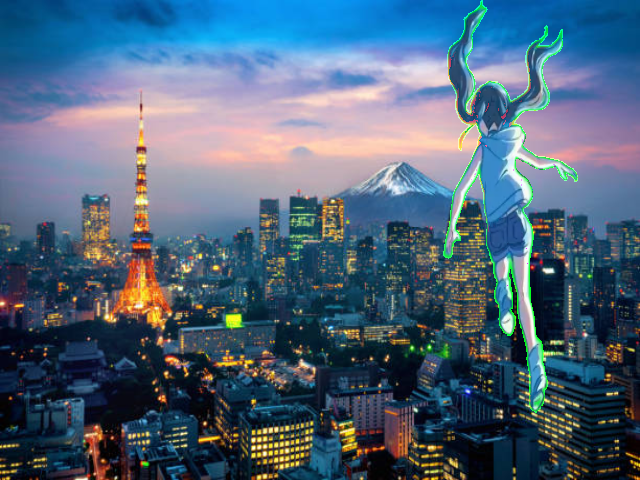

In [ ]:
replace_background(bground="/content/Image data/GreenBackground.png", obj_img="/content/Image data/Object.png", new_bground="/content/Image data/NewBackground.jpg", size=(640, 480), threshold=15)

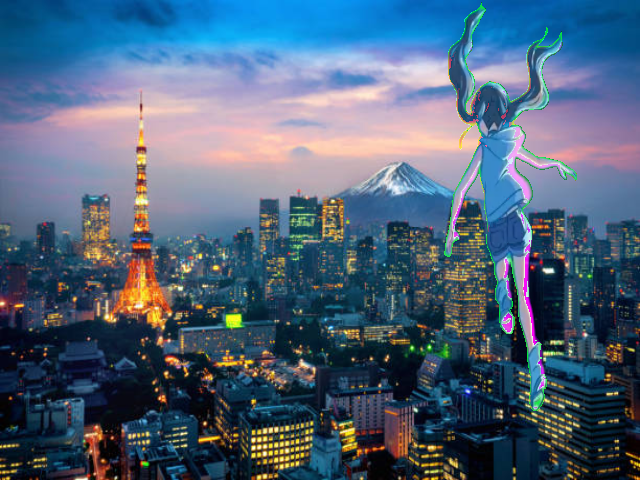

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow # Import the patch for displaying images in Colab

# read img and resize
greenBackground = cv2.imread("/content/Image data/GreenBackground.png")
greenBackground = cv2.resize(greenBackground, (640, 480))
newBackground = cv2.imread("/content/Image data/NewBackground.jpg") # Load image from file path
newBackground = cv2.resize(newBackground, (640, 480)) # Resize the loaded image
object_img = cv2.imread("/content/Image data/Object.png")
object_img = cv2.resize(object_img, (640, 480))


# calculate differences in greenBackground and Object
diff = cv2.absdiff(greenBackground, object_img)

_,output_binary = cv2.threshold(diff, 15, 255, cv2.THRESH_BINARY)

output = np.where(output_binary==0, newBackground, object_img)
cv2_imshow(output) # Use cv2_imshow instead of cv2.imshow